# Dataset 

In [30]:
#from pyspark import SparkConf, SparkContext
#from pyspark.sql import SparkSession
#from pyspark.sql import Row
#from pyspark.sql import functions as F
#from pyspark.sql.types import *
#import datetime
import pandas as pd
import numpy as np

# SQL
import datetime as dt
import pandas.io.sql as psql
import cx_Oracle
import csv
import matplotlib.pyplot as plt
from datetime import timedelta

### Crear sesion de Spark

In [3]:
#spark = SparkSession.builder.appName('APP_RFM').getOrCreate()

### SQL Empresas - Compras

In [31]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
df = pd.read_sql_query('''

 SELECT  
	trunc(ec_FECHA) AS fecha_compra,
	EC_CODIGO_PUBLICO AS numero_compra,
    pro.pr_nombre,
    s.COD_CANAL_VENTA AS canal_venta,
	em.em_id,
	em.EM_ID_CLIENTE,
	ecd.ECD_PRECIO AS IMPORTE,
	ecd.ECD_CANTIDAD AS UNIDADES,
	ecd.ECD_PRODUCTO,
    em.EM_PACK,
    p.valor
from 
	EMPLEO_ES.EMPRESAS_COMPRAS ec 
LEFT JOIN empleo_es.empresas_compras_detalles ecd ON ec.ec_id = ecd.ecd_compra
LEFT JOIN empleo_es.empresas_usuarios eu ON ec.EC_EMPRESA = eu.eu_id
LEFT JOIN empleo_Es.empresas_grupos eg ON eu.eu_grupo = eg.eg_id 
LEFT JOIN empleo_es.empresas_matrices em ON eg.eg_matriz = em.em_id
LEFT JOIN empleo_es.productos pro ON ecd.ECD_PRODUCTO = pro.pr_id
LEFT JOIN empleo_Es.Pd_Packs p on em.EM_PACK = p.ID
INNER JOIN 
	(
		select num_compra, 
		to_date(fecha_imputacion, 'yyyymmdd') AS fecha_imputacion, 
		cod_canal_venta,
		sum(importe) importe
		from 
		DWHPRO.FACT_ENTERPRISE_SALES s
		LEFT JOIN DWHPRO.DIM_CANAL_VENTA dcv ON dcv.ID_CANAL_VENTA = s.id_canal_venta
		where to_date(fecha_imputacion, 'yyyymmdd') between to_date('20160101', 'yyyymmdd') and to_date('20181231', 'yyyymmdd')
		    group by num_compra, fecha_imputacion, cod_canal_venta
		    having sum(importe) > 0
    )s ON TO_CHAR(ec.EC_CODIGO_PUBLICO) = s.NUM_COMPRA 
 WHERE 
 	trunc(ec.ec_FECHA) between to_date('20160101', 'yyyymmdd') and to_date('20181231', 'yyyymmdd')
 AND 
 	ecd.ECD_PRECIO > 0
 	--AND em.EM_PACK = 1
    AND em.EM_PRUEBA <> 1
    AND em.EM_ESTADO = 1
    AND eu.EU_ESTADO = 1
    AND eg.EG_ESTADO = 1

''', con)
df_save = df
df_save

,FECHA_COMPRA,NUMERO_COMPRA,PR_NOMBRE,CANAL_VENTA,EM_ID,EM_ID_CLIENTE,IMPORTE,UNIDADES,ECD_PRODUCTO,EM_PACK,VALOR
0,2016-05-26,9079709,Oferta de empleo,WEB,726324520,8600776388,279,1,20,1,Cliente Web
1,2016-05-26,9079709,Ocultar la identidad de la empresa,WEB,726324520,8600776388,149,1,48,1,Cliente Web
2,2016-05-26,9079709,Provincia adicional,WEB,726324520,8600776388,199,1,77,1,Cliente Web
3,2017-08-18,10579811,Oferta de empleo,WEB,726324520,8600776388,199,1,20,1,Cliente Web
4,2017-08-18,10579811,Ocultar la identidad de la empresa,WEB,726324520,8600776388,130,1,48,1,Cliente Web
5,2017-08-18,10579811,Provincia adicional,WEB,726324520,8600776388,199,1,77,1,Cliente Web
6,2017-08-18,10579811,Provincia adicional,WEB,726324520,8600776388,229,1,77,1,Cliente Web
7,2017-08-18,10579811,Provincia adicional,WEB,726324520,8600776388,199,1,77,1,Cliente Web
8,2017-08-18,10579811,Provincia adicional,WEB,726324520,8600776388,199,1,77,1,Cliente Web
9,2017-10-30,10876871,Ocultar la identidad de la empresa,WEB,726324520,8600776388,130,1,48,1,Cliente Web


### Respaldar dataset

In [32]:
df2 = df.copy()

### Aplicar filtros necesarios

In [19]:
#df2 = df[df['CANAL_VENTA'].isin(['WEB'])]

In [33]:
df2.shape

(243218, 11)

### Comprobar rango de las fechas del dataset

In [34]:
print('Orders from {} to {}'.format(df2['FECHA_COMPRA'].min(),
                                    df2['FECHA_COMPRA'].max()))

Orders from 2016-01-01 00:00:00 to 2018-12-31 00:00:00


### Crear una tabla agrupada por orden de compra

In [35]:
orders = df2.groupby(['NUMERO_COMPRA', 'FECHA_COMPRA', 'EM_ID']).agg({'IMPORTE': lambda x: x.sum()}).reset_index()
orders.head()

,NUMERO_COMPRA,FECHA_COMPRA,EM_ID,IMPORTE
0,8728241,2016-01-01,23964637266,35
1,8728247,2016-01-01,27555463330,35
2,8728259,2016-01-01,2429957612,35
3,8728271,2016-01-01,23749708388,35
4,8728277,2016-01-01,7967163856,475


### Crear fecha de comparacion t(0) para el modelo

In [36]:
NOW = orders['FECHA_COMPRA'].max() + timedelta(days=1)
NOW

Timestamp('2019-01-01 00:00:00')

### Definir periodo a estudiar en el modelo

In [37]:
period = 1096

### Dias transcurridos desde compra y t(0)

In [38]:
orders['DaysSinceOrder'] = orders['FECHA_COMPRA'].apply(lambda x: (NOW - x).days)

In [39]:
orders

,NUMERO_COMPRA,FECHA_COMPRA,EM_ID,IMPORTE,DaysSinceOrder
0,8728241,2016-01-01,23964637266,35,1096
1,8728247,2016-01-01,27555463330,35,1096
2,8728259,2016-01-01,2429957612,35,1096
3,8728271,2016-01-01,23749708388,35,1096
4,8728277,2016-01-01,7967163856,475,1096
5,8728283,2016-01-01,2189764670,195,1096
6,8728289,2016-01-01,24149792480,35,1096
7,8728295,2016-01-02,10605929546,35,1095
8,8728307,2016-01-02,26483998518,35,1095
9,8728313,2016-01-02,25623690300,180,1095


### Calcular Recencia R y Frecuencia F

In [40]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # numero de dias desde la ultima compra (Recency)
    'FECHA_COMPRA': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # total de compras en el periodo (Frequency)
}
rfm = orders.groupby('EM_ID').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'FECHA_COMPRA': 'Frequency'}, inplace=True)
rfm.head()

,EM_ID,Recency,Frequency
0,48386492,966,1
1,48389762,1028,1
2,48390002,252,14
3,48390050,169,13
4,48390319,487,1


In [41]:
rfm['Monetary'] = rfm['EM_ID'].apply(lambda x: orders[(orders['EM_ID'] == x) & (orders['FECHA_COMPRA'] >= NOW - timedelta(days=period))]['IMPORTE'].sum())
rfm.head()

,EM_ID,Recency,Frequency,Monetary
0,48386492,966,1,275
1,48389762,1028,1,650
2,48390002,252,14,5774
3,48390050,169,13,4451
4,48390319,487,1,539


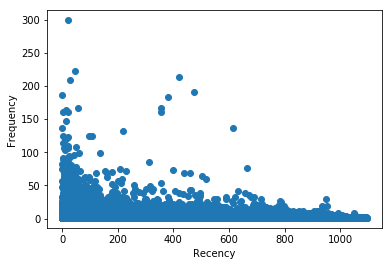

In [54]:
#Exploratory data analisis first: visualizar los datos
plt.scatter(rfm['Recency'], rfm['Frequency'])
plt.xlabel('Recency')
plt.ylabel('Frequency');

### Normalizar (*)

In [ ]:
#Dos formas de normalizar
#Primero, convierte tu columna de fecha en un índice.

#dates = df.pop('Date')
#df.index = dates

#A continuación, utilice la normalización z-score:

#df1 = (df - df.mean())/df.std()

#o escala mínima-máxima:

#df2 = (df-df.min())/(df.max()-df.min())

#Probablemente recomendaría la normalización z-score, porque la escala min-max es muy susceptible a valores atípicos.

In [109]:
#log = pd.DataFrame(rfm)

In [90]:
#min_f = log["Frequency"].min()
#dif_f = log["Frequency"].max() - min_f
#log["frec_n"] = (log["Frequency"] - min_f) / dif_f

In [113]:
#log["frec_log2"] = np.log(log["Frequency"])

In [117]:
#print('log from {} to {}'.format(log['Frequency'].min(),
#                                    log['Frequency'].max()))

log from 1 to 116


### Nueva escala Score 1-5 para Frecuencia
#### El 70% cae en el primer quintil por lo cual se crea una escala de criterios fijos para el numero de dias

In [42]:
#segun la distribucion de actividad la segmentacion significativa puede ser:
#1 compra
#2 a 3 compras
#De 4 a 7 compras
#De 7 a 15 compras
#Más de 15 compras

def f_score(x):
    if x <= 1:
        return 1
    elif x <= 3:
        return 2
    elif x <= 7:
        return 3
    elif x <= 15:
        return 4
    else:
        return 5  
#segun la distribucion de actividad la segmentacion significativa puede ser:
#1 compra
#2 compras
#3 compras
#4 compras
#5 o mas compras

def f_score2(x):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 3:
        return 3
    elif x <= 4:
        return 4
    else:
        return 5  

### Nueva escala Score 1-5 para Recency
#### Definida por el negocio y los contratos

In [43]:
#0-3 meses
#de 3 a 6 meses
#De 6 a 12 meses
#De 12 a 24 meses
#Más de 24 meses
def r_score2(x):
    if x <= 90:
        return 5
    elif x <= 180:
        return 4
    elif x <= 365:
        return 3
    elif x <= 730:
        return 2
    else:
        return 1  

### Aplicar quintiles

In [44]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 95.0, 0.4: 215.0, 0.6: 357.0, 0.8: 631.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 3.0},
 'Monetary': {0.2: 49.0, 0.4: 108.0, 0.6: 299.0, 0.8: 788.0}}

### Se crean las funciones, inversas ya que a menor recencia mayor score

In [45]:
#def r_score(x):
#    if x <= quintiles['Recency'][.2]:
#        return 5
#    elif x <= quintiles['Recency'][.4]:
#        return 4
#    elif x <= quintiles['Recency'][.6]:
#        return 3
#    elif x <= quintiles['Recency'][.8]:
#        return 2
#    else:
#        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

#### Aplicar la funcion de Frecuency para el dataset

In [46]:
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))

### Se aplican e insertan los puntajes Score

In [47]:
#rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['R'] = rfm['Recency'].apply(lambda x: r_score2(x))
#rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [48]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,EM_ID,Recency,Frequency,Monetary,F,R,M,RFM Score
0,48386492,966,1,275,1,1,3,113
1,48389762,1028,1,650,1,1,4,114
2,48390002,252,14,5774,4,3,5,345
3,48390050,169,13,4451,4,4,5,445
4,48390319,487,1,539,1,2,4,214


### Parametros para el output de RFM

### Segmentacion de clientes Teorica, a modo de visualizar, no son las etiquetas definitivas

In [49]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,EM_ID,Recency,Frequency,Monetary,F,R,M,RFM Score,Segment
0,48386492,966,1,275,1,1,3,113,hibernating
1,48389762,1028,1,650,1,1,4,114,hibernating
2,48390002,252,14,5774,4,3,5,345,loyal customers
3,48390050,169,13,4451,4,4,5,445,loyal customers
4,48390319,487,1,539,1,2,4,214,hibernating


### Plot de los resultados

#### Distribucion de R y F 

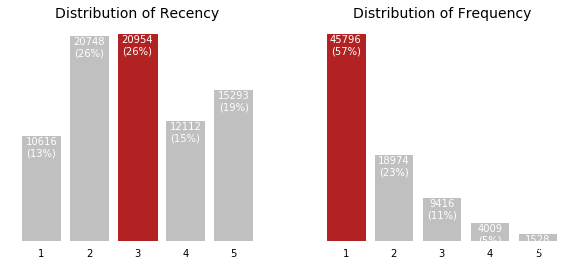

In [50]:
# plot de la distribucion de empresas en R y F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

#### Distribucion de M en RF 

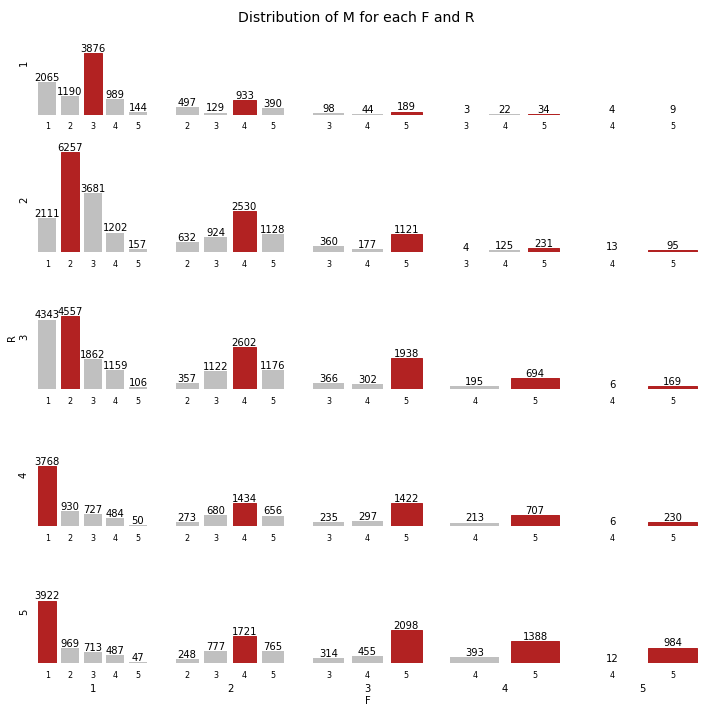

In [51]:
# graficar la distribucion de M para cada RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

### Empresas por segmento

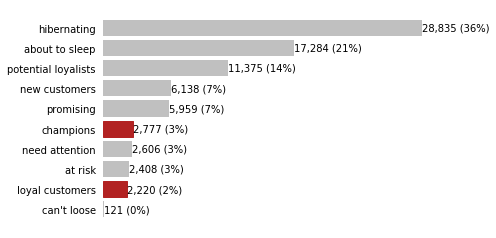

In [52]:
# Cantidad de empresas en cada segmento
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### Exportar Dataset

In [57]:
rfm.to_csv('~/Documents/GitHub/Jupyter_/data_cluster/Infojobs_dataset_rfm.csv', index= False)
#, sep=';')

In [58]:
rfm

,EM_ID,Recency,Frequency,Monetary,F,R,M,RFM Score,Segment
0,48386492,966,1,275,1,1,3,113,hibernating
1,48389762,1028,1,650,1,1,4,114,hibernating
2,48390002,252,14,5774,4,3,5,345,loyal customers
3,48390050,169,13,4451,4,4,5,445,loyal customers
4,48390319,487,1,539,1,2,4,214,hibernating
5,48390463,40,3,656,2,5,4,524,potential loyalists
6,48390583,609,2,974,2,2,5,225,hibernating
7,48390775,483,1,349,1,2,4,214,hibernating
8,48390871,770,2,633,2,1,4,124,hibernating
9,48390919,344,5,1453,3,3,5,335,need attention
